In [1]:
# get data
import pandas as pd
import numpy as np
import os
import env
import wrangle as wr

#visaulization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
telco = wr.get_telco_data()

In [3]:
telco = wr.clean_telco_data(telco)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,did_churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1


### Create the table

In [4]:
# explore specific = 
telco_one = telco[['monthly_charges', 'total_charges','churn','contract_type', 'tenure']]

In [5]:
telco_one.head()

,monthly_charges,total_charges,churn,contract_type,tenure
0,65.6,593.30,No,One year,9
1,59.9,542.40,No,Month-to-month,9
2,73.9,280.85,Yes,Month-to-month,4
3,98.0,1237.85,Yes,Month-to-month,13
4,83.9,267.40,Yes,Month-to-month,3


### How many people have each contract type?

In [6]:
contract_type = telco_one['contract_type'].value_counts()

In [7]:
# Convert the Series to a DataFrame
contract_df = pd.DataFrame({'contract_type': contract_type.index, 'count': contract_type.values})

In [8]:
contract_df

,contract_type,count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


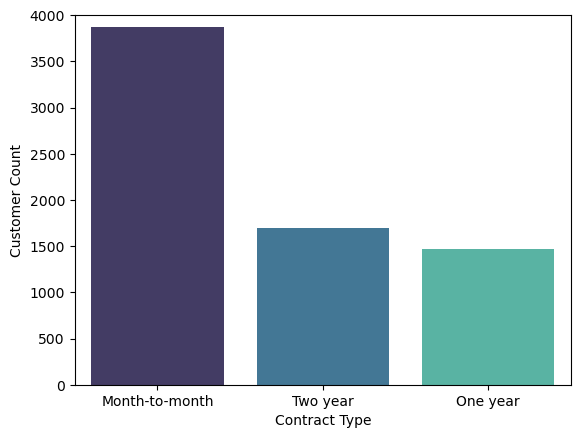

In [9]:
ax = sns.barplot(contract_df, x = 'contract_type', y = 'count', palette = 'mako')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
ax.set(ylim=(0, 4000))
plt.show();


In [10]:
month = 3875
two_year = 1695
one_year = 1473
month/(month + two_year + one_year)

0.5501916796819537

### How much money does each contract make?

In [11]:
# need a new column: 
month_to_month = telco_one[telco_one['contract_type'] == 'Month-to-month']

In [12]:
month_to_month 

,monthly_charges,total_charges,churn,contract_type,tenure
1,59.90,542.40,No,Month-to-month,9
2,73.90,280.85,Yes,Month-to-month,4
3,98.00,1237.85,Yes,Month-to-month,13
4,83.90,267.40,Yes,Month-to-month,3
5,69.40,571.45,No,Month-to-month,9
...,...,...,...,...,...
7033,18.90,18.90,No,Month-to-month,1
7036,70.15,70.15,Yes,Month-to-month,1
7037,20.95,85.50,Yes,Month-to-month,4
7039,85.10,1873.70,Yes,Month-to-month,22


In [13]:
group_churn = month_to_month.groupby('churn')
group_churn

In [14]:
average_monthly_charges = group_churn['monthly_charges'].mean()
average_monthly_charges

churn
No     61.462635
Yes    73.019396
Name: monthly_charges, dtype: float64

In [15]:
grouped_by_contract = telco_one.groupby('contract_type')

In [16]:
average_charges = grouped_by_contract[['monthly_charges', 'total_charges']].mean()
average_charges

,monthly_charges,total_charges
contract_type,,
Month-to-month,66.398490,1965.186968
One year,65.048608,4408.046504
Two year,60.770413,5147.274159


### How much money are we losing from customers who churn?

In [17]:
money = telco_one[['contract_type','monthly_charges', 'total_charges','churn']]
money

,contract_type,monthly_charges,total_charges,churn
0,One year,65.60,593.30,No
1,Month-to-month,59.90,542.40,No
2,Month-to-month,73.90,280.85,Yes
3,Month-to-month,98.00,1237.85,Yes
4,Month-to-month,83.90,267.40,Yes
...,...,...,...,...
7038,One year,55.15,742.90,No
7039,Month-to-month,85.10,1873.70,Yes
7040,Month-to-month,50.30,92.75,No
7041,Two year,67.85,4627.65,No


In [18]:
money_graph = money.groupby(['contract_type', 'churn'])[['total_charges', 'monthly_charges']].mean().reset_index()
money_graph

,contract_type,churn,total_charges,monthly_charges
0,Month-to-month,No,2280.984347,61.462635
1,Month-to-month,Yes,1541.579607,73.019396
2,One year,No,4222.399617,62.508148
3,One year,Yes,5869.736145,85.050904
4,Two year,No,5036.222374,60.012477
5,Two year,Yes,8957.738542,86.777083


### How many people churn

In [19]:
# third graph
group_churn = telco_one[['contract_type','churn']]
group_churn

,contract_type,churn
0,One year,No
1,Month-to-month,No
2,Month-to-month,Yes
3,Month-to-month,Yes
4,Month-to-month,Yes
...,...,...
7038,One year,No
7039,Month-to-month,Yes
7040,Month-to-month,No
7041,Two year,No


In [20]:
grouped_data = group_churn.groupby(['contract_type', 'churn']).size().reset_index(name='count')

In [21]:
grouped_data

,contract_type,churn,count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


In [22]:
churn_yes_data = grouped_data[grouped_data['churn'] == 'Yes']
churn_yes_data

,contract_type,churn,count
1,Month-to-month,Yes,1655
3,One year,Yes,166
5,Two year,Yes,48


In [23]:
total_month = 3875
total_one = 1473
total_two = 1695
overall_total = 7043

In [24]:
1655/overall_total

0.2349850915802925

In [25]:
1655/total_month

0.4270967741935484

In [26]:
166/total_one

0.11269517990495587

In [27]:
48/total_two

0.02831858407079646

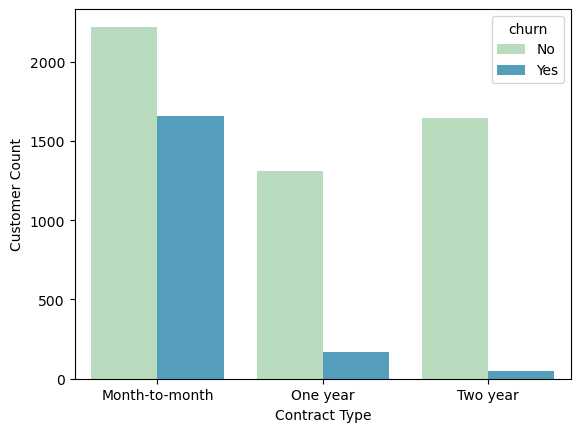

In [28]:
sns.barplot(grouped_data, x = 'contract_type', y = 'count', hue = 'churn', palette = 'GnBu')
plt.ylabel('Customer Count')
plt.xlabel('Contract Type')
plt.show()

Text(0, 0.5, 'Contract Type')

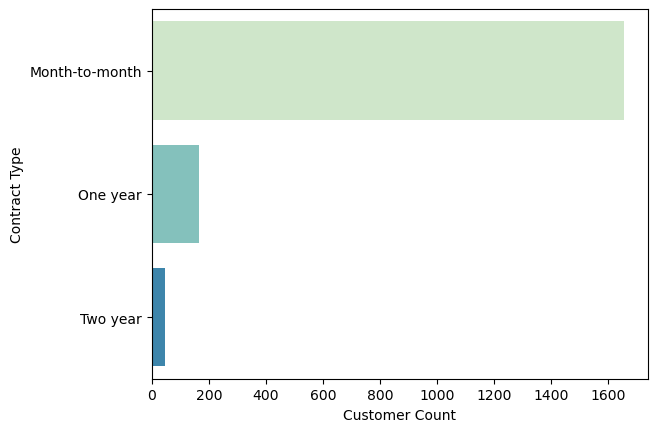

In [29]:
sns.barplot(churn_yes_data, x = 'count', y = 'contract_type', palette = 'GnBu')
plt.xlabel('Customer Count')
plt.ylabel('Contract Type')

### How much money is being lost?

In [30]:
telco_one

,monthly_charges,total_charges,churn,contract_type,tenure
0,65.60,593.30,No,One year,9
1,59.90,542.40,No,Month-to-month,9
2,73.90,280.85,Yes,Month-to-month,4
3,98.00,1237.85,Yes,Month-to-month,13
4,83.90,267.40,Yes,Month-to-month,3
...,...,...,...,...,...
7038,55.15,742.90,No,One year,13
7039,85.10,1873.70,Yes,Month-to-month,22
7040,50.30,92.75,No,Month-to-month,2
7041,67.85,4627.65,No,Two year,67


In [31]:
total_sum = telco_one.groupby('contract_type').agg({'monthly_charges': 'mean', 'total_charges': 'sum'})
total_sum

,monthly_charges,total_charges
contract_type,,
Month-to-month,66.398490,7615099.5
One year,65.048608,6493052.5
Two year,60.770413,8724629.7


In [32]:
telco_churn = telco_one[telco_one['churn'] == 'Yes']
telco_no_churn = telco_one[telco_one['churn'] == 'No']

In [33]:
summary_churn = telco_churn.groupby('contract_type').agg({'monthly_charges': 'mean', 'total_charges': 'sum'})
summary_churn

,monthly_charges,total_charges
contract_type,,
Month-to-month,73.019396,2551314.25
One year,85.050904,974376.20
Two year,86.777083,429971.45


In [34]:
summary_no_churn = telco_no_churn.groupby('contract_type').agg({'monthly_charges': 'mean', 'total_charges': 'sum'})
summary_no_churn

,monthly_charges,total_charges
contract_type,,
Month-to-month,61.462635,5063785.25
One year,62.508148,5518676.30
Two year,60.012477,8294658.25


|contract_type| churn | did_not_churn|
|-------------|-------|--------------|
| Month-to-month| 73.02 | 61.46|
|--------------|-----------|---------|
|One Year| 85.05 | 62.51|
| ----------------|---------|
|Two Year | 86.78 | 60.01 |

In [35]:
data = {
    'contract_type': ['Month-to-month', 'One Year', 'Two Year'],
    'churn': [73.02, 85.05, 86.78],
    'did_not_churn': [61.46, 62.51, 60.01]
}

In [36]:
monthly_charges = pd.DataFrame(data)

In [37]:
monthly_charges.set_index('contract_type')

,churn,did_not_churn
contract_type,,
Month-to-month,73.02,61.46
One Year,85.05,62.51
Two Year,86.78,60.01


In [38]:
monthly_charges

,contract_type,churn,did_not_churn
0,Month-to-month,73.02,61.46
1,One Year,85.05,62.51
2,Two Year,86.78,60.01


<Axes: xlabel='contract_type', ylabel='Percentage'>

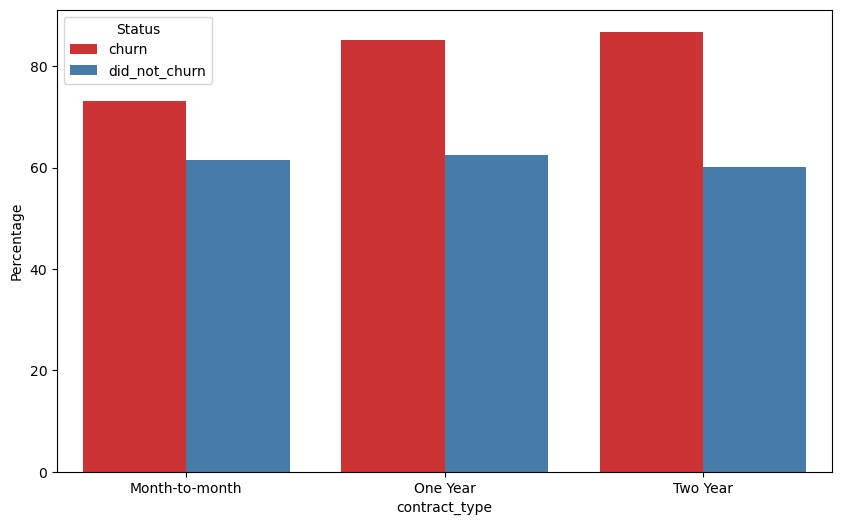

In [43]:
df_melted = pd.melt(monthly_charges, id_vars='contract_type', var_name='Status', value_name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(x='contract_type', y='Percentage', hue='Status', data=df_melted, palette="Set1")
